In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("database.csv")

In [3]:
print("Initial dataset shape:", df.shape)
print(df.head())

Initial dataset shape: (23412, 21)
         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN          

In [6]:
# Preprocessing: Clean column names and handle missing data
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df = df.dropna(subset=['date', 'latitude', 'longitude', 'magnitude', 'location_source'])

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

In [21]:
df['year'] = df['date'].dt.year

C:\Users\saisagar\AppData\Local\Temp\ipykernel_11460\1339927953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


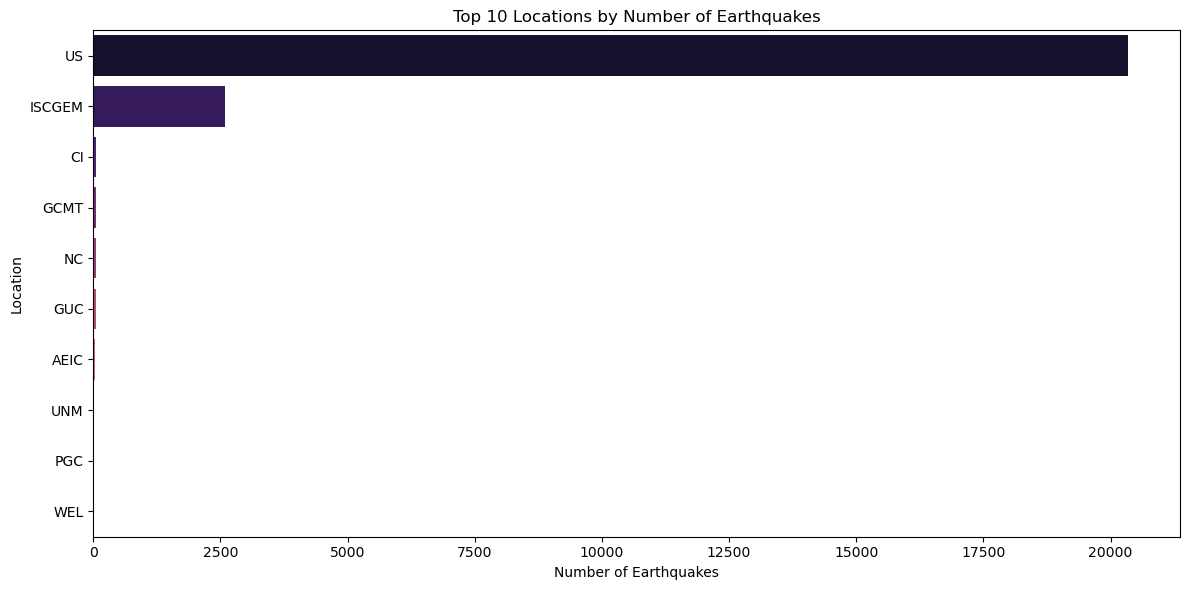

In [22]:
#Top 10 locations with most earthquakes
top_locations = df['location_source'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Locations by Number of Earthquakes")
plt.xlabel("Number of Earthquakes")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

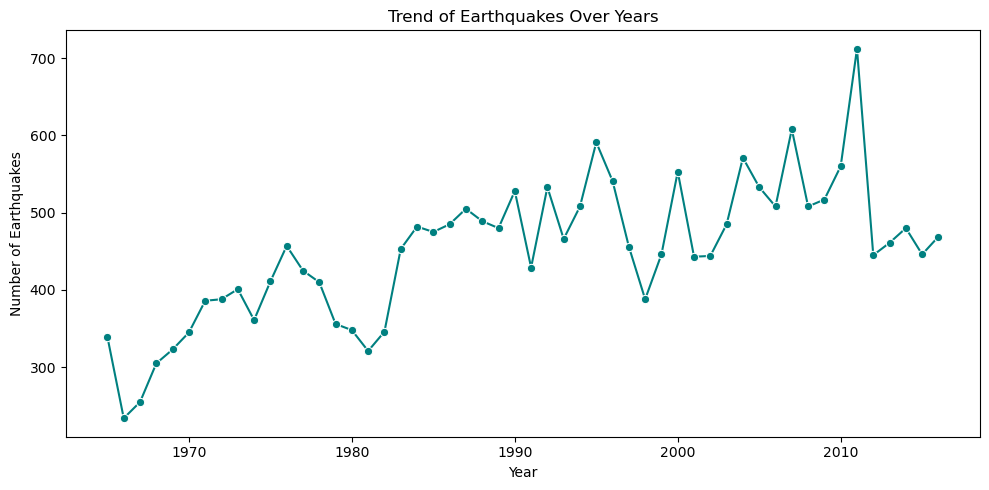

In [23]:
# Yearly trend of earthquakes
earthquakes_by_year = df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 5))
sns.lineplot(data=earthquakes_by_year, x='year', y='count', marker='o', color='teal')
plt.title("Trend of Earthquakes Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.tight_layout()
plt.show()

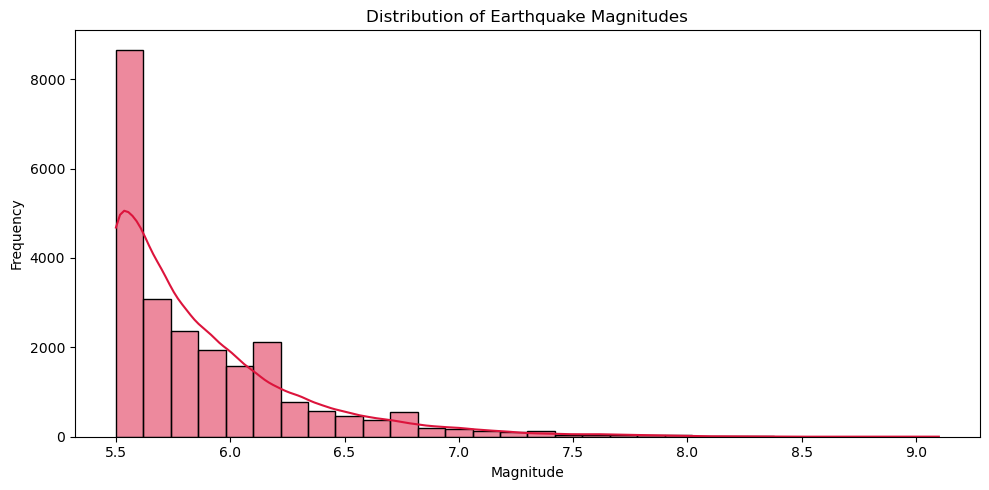

In [24]:
# Magnitude distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['magnitude'], bins=30, kde=True, color='crimson')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [25]:
cleaned_path = "cleaned_earthquake_data.csv"
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned data saved to {cleaned_path}")


Cleaned data saved to cleaned_earthquake_data.csv
